A. Rewrite the above as an unconstraint problem (use the linear constraint to substitute out  x2
 )
 
 \begin{equation}
\begin{array}{rrclcl}
\displaystyle \max  & x_1^{0.5}.x_2^{0.5}\\
\textrm{s.t.} & {0.5}x_1 + x_2=1 \\
& x_1,x_2\geq0\\
\end{array}
\end{equation}

i. Plots the objective function for the feasible range for  x1

ii. Write down the first order condition and find the solution (assume an interior solution).

iii. Derive the second derivative of the objective function at the optimal.

iv. Evaluate the second derivative at the optimal value of  x1 and for the entire feasible range. Plots your results.

v. Find the solution using a Optim package, and the GoldenSection() solver option.

## i

rewriting optimization:

$x_2=1-0.5x_1$


Now we are solving the below
 \begin{equation}
\begin{array}{rrclcl}
\displaystyle \max  & (x_1-0.5x_1^2)^{0.5}\\
\textrm{s.t.} 
& 2 \geq x_1\geq0\\
\end{array}
\end{equation}

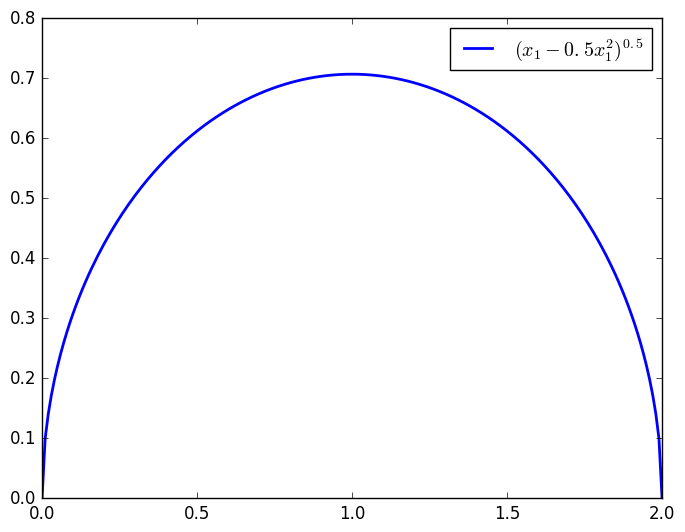

PyObject <matplotlib.legend.Legend object at 0x3255b2dd0>

In [64]:
using PyPlot

x = collect(0:0.01:2)
ff = (x- 0.5* x.^2).^0.5

fig, ax = subplots()
ax[:plot](x,ff,color="blue",linewidth=2,label=L"(x_1-0.5x_1^2)^{0.5}",alpha=1)
ax[:legend](loc="top center")


## ii

$ f = (x- 0.5x^2)^{0.5}$

$ Df=\dfrac{Df(x)}{x} = \dfrac{0.5-0.5x}{\sqrt{(x- 0.5 x^2)}}=0$

$\rightarrow  0.5-0.5x=0 $

$\rightarrow x=1$


Below is the plot of derivative of f in the range

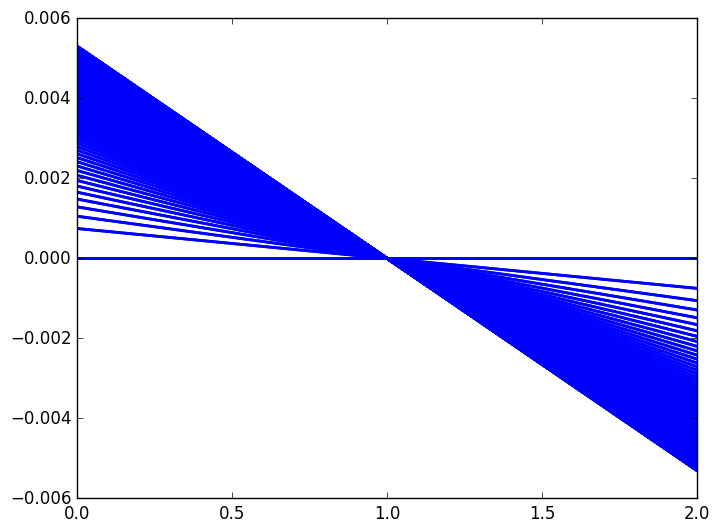

201-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x325141750>
 PyObject <matplotlib.lines.Line2D object at 0x325141190>
 PyObject <matplotlib.lines.Line2D object at 0x3251415d0>
 PyObject <matplotlib.lines.Line2D object at 0x324eccc90>
 PyObject <matplotlib.lines.Line2D object at 0x324eccc10>
 PyObject <matplotlib.lines.Line2D object at 0x324ecc0d0>
 PyObject <matplotlib.lines.Line2D object at 0x324eccf50>
 PyObject <matplotlib.lines.Line2D object at 0x324ecca90>
 PyObject <matplotlib.lines.Line2D object at 0x324ecc710>
 PyObject <matplotlib.lines.Line2D object at 0x324eccdd0>
 PyObject <matplotlib.lines.Line2D object at 0x324eccf90>
 PyObject <matplotlib.lines.Line2D object at 0x324ecca10>
 PyObject <matplotlib.lines.Line2D object at 0x324ecc190>
 ⋮                                                       
 PyObject <matplotlib.lines.Line2D object at 0x325336650>
 PyObject <matplotlib.lines.Line2D object at 0x325336790>
 PyObject <matplotlib.lines.Line2D object at 0

In [83]:
using PyPlot

x = collect(0:0.01:2)
Df = (0.5-0.5*x)/(x- 0.5* x.^2).^0.5

fig, ax = subplots()
ax[:plot](x,Df,color="blue",linewidth=2,alpha=1)


##  iii & iv

$ Df^{''}=\dfrac{D^{2}f(x)}{dx^2} = \dfrac{-0.5}{(2x-x^2) \sqrt{(x- 0.5 x^2)}}$

$\rightarrow  Max { Df^{''}}= \dfrac{-1}{\sqrt 2} $ $at$ $x=1$

In [92]:
using PyPlot

x = collect(0:0.01:2)
Df2= (-0.5)/ (2*x-x.^2)
#Df2 = -.5/(2*x-x.^2)*((x-0.5*x.^2).^0.5)

plot(x,Df2)

LoadError: MethodError: no method matching /(::Float64, ::Array{Float64,1})[0m
Closest candidates are:
  /(::Float64, [1m[31m::Float64[0m) at float.jl:246
  /(::Real, [1m[31m::Complex{T<:Real}[0m) at complex.jl:182
  /(::Union{Float16,Float32,Float64}, [1m[31m::BigFloat[0m) at mpfr.jl:284
  ...[0m

$Df''$ doesn seem to be positive semi-definite.


## V

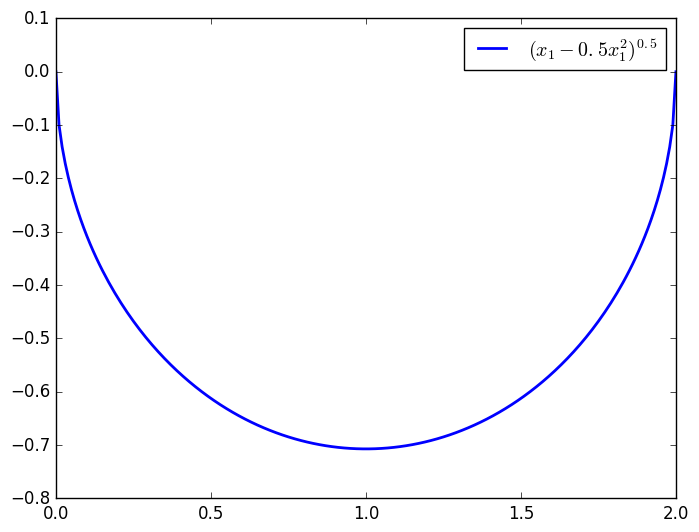

PyObject <matplotlib.legend.Legend object at 0x33155f590>

In [113]:
using PyPlot

x = collect(0:0.01:2)
ff = -(x- 0.5* x.^2).^0.5

fig, ax = subplots()
ax[:plot](x,ff,color="blue",linewidth=2,label=L"(x_1-0.5x_1^2)^{0.5}",alpha=1)
ax[:legend](loc="top center")



In [106]:
using Optim
f_univariate(x) = -sqrt(x - 0.5.*x^2)
optimize(f_univariate, 0.0,2.0,GoldenSection())

Results of Optimization Algorithm
 * Algorithm: Golden Section Search
 * Search Interval: [0.000000, 2.000000]
 * Minimizer: 4.236010e-16
 * Minimum: 2.058157e-08
 * Iterations: 74
 * Convergence: max(|x - x_upper|, |x - x_lower|) <= 2*(1.5e-08*|x|+2.2e-16): true
 * Objective Function Calls: 75

In [107]:
using JuMP, NLopt
m = Model(solver=NLoptSolver(algorithm=:LD_SLSQP))

@variable(m, x1, start = 0)
@variable(m, x2, start = 0)
@NLconstraint(m, 0.5*x1+x2  ==  1)
@NLobjective(m, Max, x1^0.5 + x2^0.5)

solve(m)
println("x1 = ", getvalue(x1), "; x2 = ", getvalue(x2), " z = ", getobjectivevalue(m))

INFO: Recompiling stale cache file /Users/Cyrus/.julia/lib/v0.5/JuMP.ji for module JuMP.


LoadError: ArgumentError: Module NLopt not found in current path.
Run `Pkg.add("NLopt")` to install the NLopt package.

In [108]:
#Pkg.add("NLopt")

INFO: Cloning cache of AxisArrays from https://github.com/JuliaArrays/AxisArrays.jl.git
INFO: Cloning cache of CatIndices from https://github.com/JuliaArrays/CatIndices.jl.git
INFO: Cloning cache of ComputationalResources from https://github.com/timholy/ComputationalResources.jl.git
INFO: Cloning cache of CustomUnitRanges from https://github.com/JuliaArrays/CustomUnitRanges.jl.git
INFO: Cloning cache of FFTViews from https://github.com/JuliaArrays/FFTViews.jl.git
INFO: Cloning cache of ImageAxes from https://github.com/JuliaImages/ImageAxes.jl.git
INFO: Cloning cache of ImageCore from https://github.com/JuliaImages/ImageCore.jl.git
INFO: Cloning cache of ImageFiltering from https://github.com/JuliaImages/ImageFiltering.jl.git
INFO: Cloning cache of ImageMetadata from https://github.com/JuliaImages/ImageMetadata.jl.git
INFO: Cloning cache of IndirectArrays from https://github.com/JuliaArrays/IndirectArrays.jl.git
INFO: Cloning cache of IntervalSets from https://github.com/JuliaMath/Inte

Updated 3 taps (homebrew/core, homebrew/science, staticfloat/juliadeps).
==> New Formulae
abuse
advancemame
advancemenu
advancescan
angband
angolmois
ant@1.9
apm-bash-completion
aptly-completion
arx-libertatis
atari800
aurora
autorest
avanor
babel
ballerburg
bastet
bit
blastem
bochs
boom-completion
boost-mpi
boot2docker-completion
bower
brew-cask-completion
brogue
bubbros
bundler-completion
c10t
c2048
cap-completion
cargo-completion
carrot2
cataclysm
cdogs-sdl
cgoban
chakra
cheapglk
cheops
chezscheme
chocolate-doom
ckan
cnats
cockatrice
collector-sidecar
color-code
corsixth
curseofwar
ddd
dehydrated
dgen
django-completion
dmenu
docker-completion
docker-compose-completion
docker-machine-completion
dopewars
dosbox
dosbox-x
dungeon
dwarf-fortress
dwm
easy-tag
easyrpg-player
einstein
elasticsearch@2.3
ems-flasher
enigma
exult
fabric-completion
fairymax
fceux
feh
fifechan
fizmo
fmsx
fox
freeciv
freeglut
freerdp
frobtads
frotz
fs-uae
fuego
fuse-emulator
gearboy
gearsystem
geeqie
gem-completi

INFO: Building GLPK
INFO: Building HDF5
INFO: Building Nettle
INFO: Building ZMQ
INFO: Building IJulia
INFO: Found Jupyter version 4.2.0: jupyter
Writing IJulia kernelspec to /Users/Cyrus/.julia/v0.5/IJulia/deps/julia-0.5/kernel.json ...
Installing julia kernelspec julia-0.5
[InstallKernelSpec] Removing existing kernelspec in /Users/Cyrus/Library/Jupyter/kernels/julia-0.5
[InstallKernelSpec] Installed kernelspec julia-0.5 in /Users/Cyrus/Library/Jupyter/kernels/julia-0.5
INFO: Building NLopt


==> Installing nlopt from staticfloat/juliatranslated
==> Downloading https://homebrew.bintray.com/bottles-science/nlopt-2.4.2_2.sierra.bottle.tar.gz
==> Pouring nlopt-2.4.2_2.sierra.bottle.tar.gz
🍺  /Users/Cyrus/.julia/v0.5/Homebrew/deps/usr/Cellar/nlopt/2.4.2_2: 19 files, 1021.4K


INFO: Building Plots
INFO: Building PyCall


Fetching package metadata ...........
Solving package specifications: .

Package plan for installation in environment /Users/Cyrus/.julia/v0.5/Conda/deps/usr:

The following NEW packages will be INSTALLED:

    functools32:  3.2.3.2-py27_0   
    subprocess32: 3.2.7-py27_0     

The following packages will be UPDATED:

    conda:        4.3.4-py27_0      --> 4.3.13-py27_0    
    matplotlib:   1.5.3-np111py27_1 --> 2.0.0-np112py27_0
    numpy:        1.11.3-py27_0     --> 1.12.0-py27_0    

functools32-3. 100% |###############################| Time: 0:00:00   1.10 MB/s
numpy-1.12.0-p 100% |###############################| Time: 0:00:00  10.12 MB/s
subprocess32-3 100% |###############################| Time: 0:00:00   7.19 MB/s
matplotlib-2.0 100% |###############################| Time: 0:00:00  11.17 MB/s
conda-4.3.13-p 100% |###############################| Time: 0:00:00  12.61 MB/s


INFO: PyCall is using /Users/Cyrus/.julia/v0.5/Conda/deps/usr/bin/python (Python 2.7.13) at /Users/Cyrus/.julia/v0.5/Conda/deps/usr/bin/python, libpython = /Users/Cyrus/.julia/v0.5/Conda/deps/usr/lib/libpython2.7
INFO: /Users/Cyrus/.julia/v0.5/PyCall/deps/deps.jl has not changed
INFO: /Users/Cyrus/.julia/v0.5/PyCall/deps/PYTHON has not changed
INFO: Building LightXML
INFO: Package database updated
INFO: METADATA is out-of-date — you may not have the latest version of NLopt
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [109]:
using JuMP, NLopt
m = Model(solver=NLoptSolver(algorithm=:LD_SLSQP))

@variable(m, x1, start =-1.0)
@variable(m, x2, start =-2.0)
@NLconstraint(m,  x1^2 + x2 ^2 ==  2)
@NLobjective(m, Min, x1*x2^2)

solve(m)
println("x1 = ", getvalue(x1), "; x2 = ", getvalue(x2))

INFO: Precompiling module NLopt.


x1 = -0.8164972778859152; x2 = -1.1547000665807572
